# Predicting Survival on the Titanic: Data Analysis & ML Modeling

The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” 
RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board,
resulting in the death of 1502 out of 2224 passengers and crew.
While there was some element of luck involved in surviving, it seems some groups of people were more likely
to survive than others.
In this challenge, we ask you to build a predictive model that answers the question:
“what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### Data Description

1. PassengerId - Passenger ID
2. Survived - Weather Survived or not: 0 = No, 1 = Yes
3. Pclass - Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
4. Name - Name of the Passenger
5. Sex - Gender
6. Age - Age in Years
7. SibSp - No. of siblings / spouses aboard the Titanic
8. Parch - No. of parents / children aboard the Titanic
9. Ticket - Ticket number
10. Fare - Passenger fare
11. Cabin - Cabin number
12. Embarked - Port of Embarkation:C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [2]:
import warnings
warnings.simplefilter('ignore')

### EDA

In [3]:
ttc_df = pd.read_csv('Titanic-Dataset.csv')

In [4]:
ttc_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
ttc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
ttc_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The dataset includes 891 passengers. The average age is 29-30 years, with a range from 4 months to 80 years. The fare ranges from 0 to 512, with a mean of 32. 75% of passengers paid a fare of 31 or less

In [7]:
ttc_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are some missing values in such columns as Age, Cabin,Embarked

In [8]:
ttc_df.duplicated().sum()

0

There are no dupicates in our dataset

In [9]:
### convert the columns to the lowercase
ttc_df.columns = ttc_df.columns.str.lower()

In [10]:
ttc_df

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
ttc_df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

The distribution of passengers is 549 died and 342 survived

In [12]:
ttc_df['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

There are 577 men and 314 women among the passengers

In [15]:
print(f"Missed values in Cabin: {ttc_df['cabin'].isnull().sum()}")
print(f"Solidity: {(1 - ttc_df['cabin'].isnull().sum()/len(ttc_df)):.2%}")

Missed values in Cabin: 687
Solidity: 22.90%


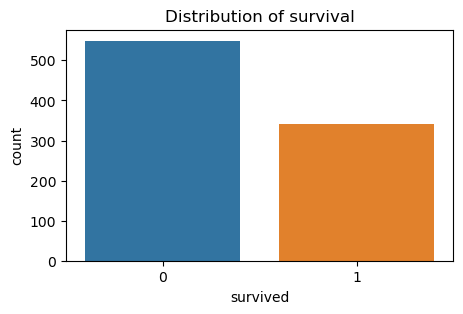

In [16]:
plt.figure(figsize=(5, 3)) 
sns.countplot(x = 'survived', data = ttc_df)
plt.title('Distribution of survival')
plt.show()

### Data Preprocessing

In [17]:
#fill in the missing values in column "age" with the median
ttc_df['age'].fillna( ttc_df['age'].median(), inplace=True)

In [18]:
ttc_df['age'] = ttc_df['age'].astype(int)

In [19]:
ttc_df['age'].unique()

array([22, 38, 26, 35, 28, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
        8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 29, 65,  5, 11, 45, 17, 32,
       16, 25,  0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

In [20]:
#fill in the missing values in column "embarked" with the mode
ttc_df['embarked'].fillna(ttc_df['embarked'].mode()[0], inplace=True)

In [21]:
ttc_df['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

### Feature Engineering

In [22]:
# Create new features: extract passenger titles from names
ttc_df['title'] = ttc_df['name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [23]:
ttc_df['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

There are titles: Mr - Mister, Mrs - Missus, Miss - unmarried woman or young lady, Master - young boy 12-13 y.o., 
Don - Honorary Italian or Spanish Title, Rev - Reverend, Dr- Doctor, Mme - Madame,Ms - Miss, Major - Major, Lady - Lady,
Sir - Sir, Mlle - Mademoiselle, Col - Colonel, Capt - Captain, Countess- Honorary Title, Jonkheer - Honorary Title

In [24]:
#calculate family size: all relatives plus the passenger
ttc_df['familysize'] = ttc_df['sibsp'] + ttc_df['parch'] + 1

In [25]:
#create a feature indicating if a passenger was alone
ttc_df['alone'] = (ttc_df['familysize']==1).astype(int)

In [26]:
#create a new feature by dividing all passangers into the age groups
ttc_df['agegroup'] = pd.cut(ttc_df['age'], bins = [0, 12, 18, 35, 60, 100], labels = ['child', 'teen', 'adult', 'middle', 'senior'])

In [27]:
ttc_df['agegroup'] = ttc_df['agegroup'].astype('object')

### Statistic Analysis

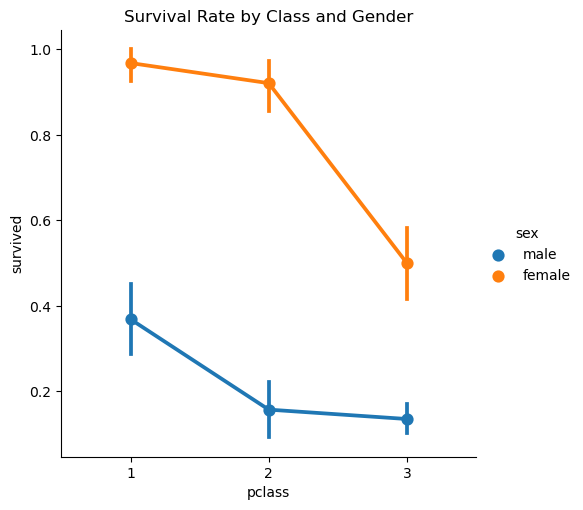

In [28]:
# Visualize survival by class and gender
sns.catplot(x='pclass', y='survived', hue='sex', kind='point', data=ttc_df)
plt.title('Survival Rate by Class and Gender')
plt.show()

The distribution of survival by class and gender reveals that male passengers in first and second class had lower survival rates than female passengers in all classes

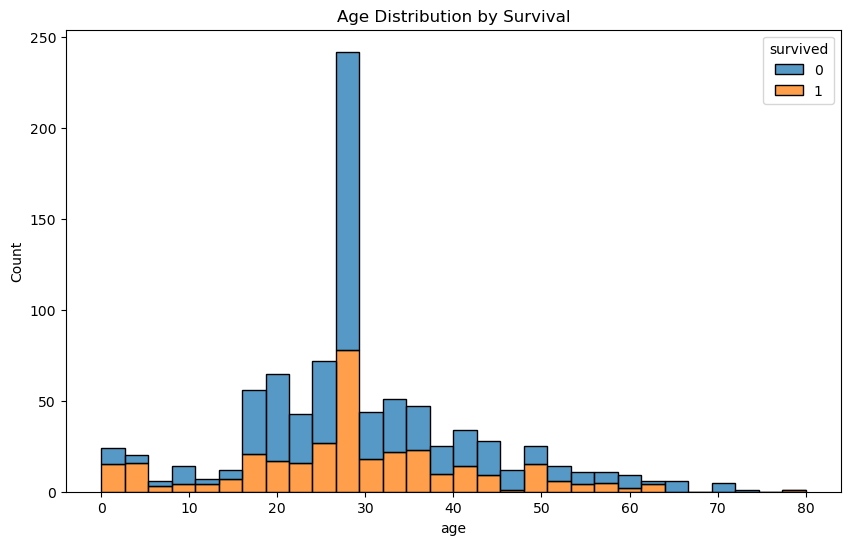

In [29]:
# Visualize distribution of survival by age
plt.figure(figsize=(10, 6))
sns.histplot(data=ttc_df, x='age', hue='survived', multiple='stack', bins=30)
plt.title('Age Distribution by Survival')
plt.show()

The distribution of survival by age reveals that the highest concentration of survivors is among passengers aged 20-40 years, with a particular peak around 28-30 years. However, this same age group (28-30) also shows a high number of fatalities. Notably, there were no survivors among passengers over 65 years old

In [30]:
#Create a new column 'deck' by extracting the first character from the 'cabin' column, then fill its missing values
ttc_df['deck'] = ttc_df['cabin'].str[0]
ttc_df['deck'].fillna('Unknown', inplace=True)

In [31]:
# Visualize distribution of survival by desk
deck_survival = ttc_df.groupby('deck')['survived'].mean().sort_values(ascending=False)
print("Survived by the desk:")
print(deck_survival)

Survived by the desk:
deck
D          0.757576
E          0.750000
B          0.744681
F          0.615385
C          0.593220
G          0.500000
A          0.466667
Unknown    0.299854
T          0.000000
Name: survived, dtype: float64


The distribution of survival by deck reveals the highest concentration of survivors on decks B, D, and E

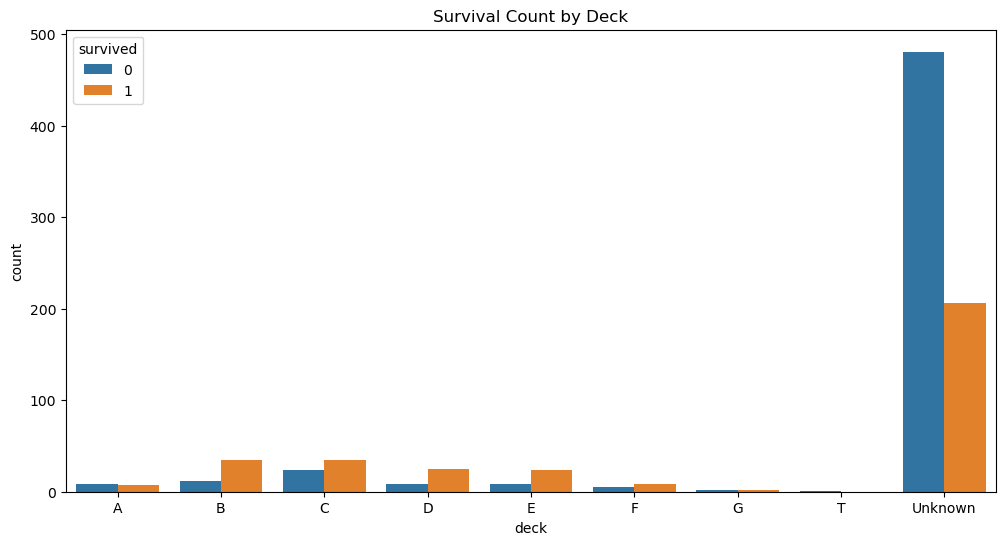

In [32]:
# Visualize distribution of survival by desk
plt.figure(figsize=(12, 6))
sns.countplot(x='deck', hue='survived', data=ttc_df, order=sorted(ttc_df['deck'].unique()))
plt.title('Survival Count by Deck')
plt.xlabel('deck')
plt.ylabel('count')
plt.show()

The highest number of survivors were from decks B and C. However, due to the high number of missing values in this column, we were unable to determine the deck for a significant portion of passengers

In [33]:
ttc_df

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,familysize,alone,agegroup,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0,adult,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs,2,0,middle,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,adult,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs,2,0,adult,C
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Mr,1,1,adult,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,Rev,1,1,adult,Unknown
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,Miss,1,1,adult,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,NaN,S,Miss,4,0,adult,Unknown
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,Mr,1,1,adult,C


In [34]:
# allocation by port of embarkment
embarked_counts = ttc_df['embarked'].value_counts()
print("Allocation by port of embarkment:")
print(embarked_counts)

Allocation by port of embarkment:
embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [ ]:
C = Cherbourg, Q = Queenstown, S = Southampton

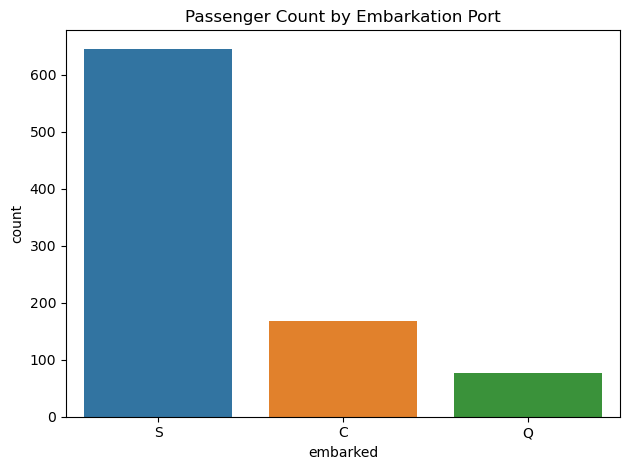

In [38]:
# Passenger Count by Embarkation Port
sns.countplot(x='embarked', data=ttc_df)
plt.title('Passenger Count by Embarkation Port')
plt.tight_layout()
plt.show()

The majority of passengers embarked from Southampton (646), followed by Cherbourg (168) and Queenstown (77)

In [35]:
# survivals by Embarkation Port
embarked_survival = ttc_df.groupby('embarked')['survived'].mean()
print("Survivals by Embarkation Port:")
print(embarked_survival)

Survivals by Embarkation Port:
embarked
C    0.553571
Q    0.389610
S    0.339009
Name: survived, dtype: float64


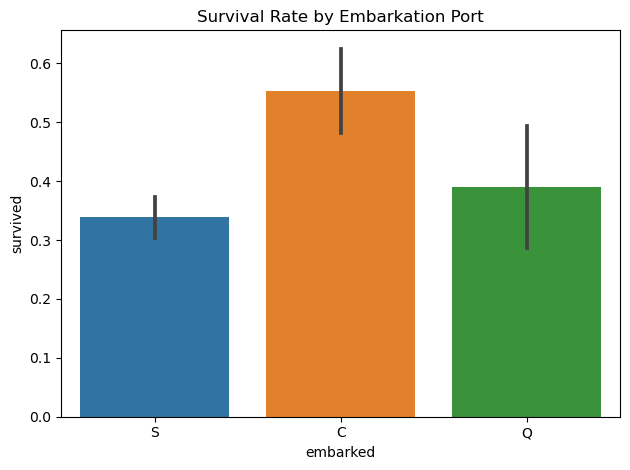

In [39]:
# Survival Rate by Embarkation Port
sns.barplot(x='embarked', y='survived', data=ttc_df)
plt.title('Survival Rate by Embarkation Port')

plt.tight_layout()
plt.show()

Cherbourg had the highest survival rate at 55%.

In [64]:
# encoding categorical variables 
for col in ['sex', 'embarked', 'agegroup', 'title', 'deck']:
    ttc_df[col] = LabelEncoder().fit_transform(ttc_df[col])

In [65]:
#select columns excluding object type
ttc_df_2 = ttc_df.select_dtypes(exclude='object')

In [66]:
ttc_df_2

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked,title,familysize,alone,agegroup,deck
0,1,0,3,1,22,1,0,7.2500,2,12,2,0,0,8
1,2,1,1,0,38,1,0,71.2833,0,13,2,0,2,2
2,3,1,3,0,26,0,0,7.9250,2,9,1,1,0,8
3,4,1,1,0,35,1,0,53.1000,2,13,2,0,0,2
4,5,0,3,1,35,0,0,8.0500,2,12,1,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27,0,0,13.0000,2,15,1,1,0,8
887,888,1,1,0,19,0,0,30.0000,2,9,1,1,0,1
888,889,0,3,0,28,1,2,23.4500,2,9,4,0,0,8
889,890,1,1,1,26,0,0,30.0000,0,12,1,1,0,2


### Feature Selection 

In [67]:
ttc_corr = ttc_df_2.corr()
ttc_corr

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked,title,familysize,alone,agegroup,deck
passengerid,1.000000,-0.005007,-0.035144,0.042939,0.034322,-0.057527,-0.001652,0.012658,0.013128,0.021692,-0.040143,0.057462,0.035170,-0.030939
survived,-0.005007,1.000000,-0.338481,-0.543351,-0.064909,-0.035322,0.081629,0.257307,-0.167675,-0.201345,0.016639,-0.203367,0.068562,-0.301116
pclass,-0.035144,-0.338481,1.000000,0.131900,-0.339999,0.083081,0.018443,-0.549500,0.162098,0.045541,0.065997,0.135207,-0.162710,0.746616
sex,0.042939,-0.543351,0.131900,1.000000,0.080750,-0.114631,-0.245489,-0.182333,0.108262,0.256407,-0.200988,0.303646,-0.070111,0.123076
age,0.034322,-0.064909,-0.339999,0.080750,1.000000,-0.233066,-0.172745,0.096838,-0.018222,0.272791,-0.245593,0.171807,0.153467,-0.255832
sibsp,-0.057527,-0.035322,0.083081,-0.114631,-0.233066,1.000000,0.414838,0.159651,0.068230,-0.191786,0.890712,-0.584471,0.044949,0.041540
parch,-0.001652,0.081629,0.018443,-0.245489,-0.172745,0.414838,1.000000,0.216225,0.039798,-0.119721,0.783111,-0.583398,0.163533,-0.032548
fare,0.012658,0.257307,-0.549500,-0.182333,0.096838,0.159651,0.216225,1.000000,-0.224719,-0.086359,0.217138,-0.271832,0.098343,-0.523013
embarked,0.013128,-0.167675,0.162098,0.108262,-0.018222,0.068230,0.039798,-0.224719,1.000000,0.066462,0.066516,0.063532,-0.014905,0.194255
title,0.021692,-0.201345,0.045541,0.256407,0.272791,-0.191786,-0.119721,-0.086359,0.066462,1.000000,-0.190890,0.060627,-0.095760,0.066826


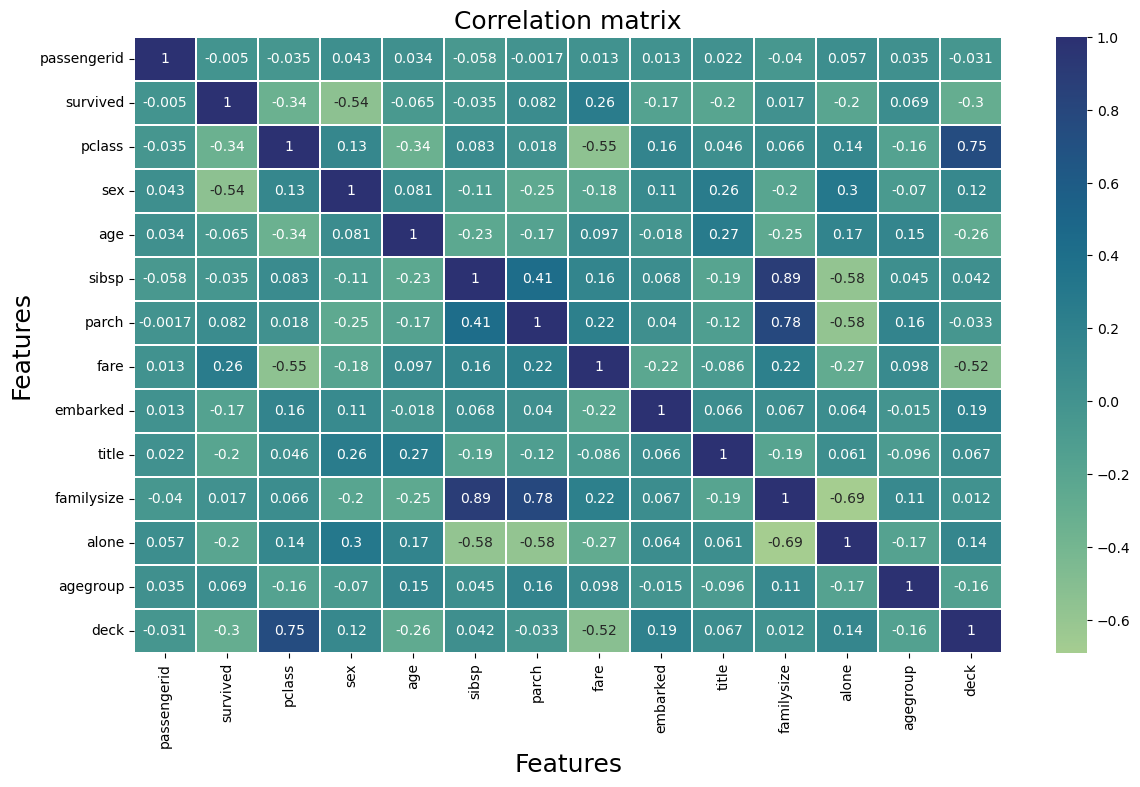

In [68]:
# visualize correlation matrix
plt.figure(figsize=(14,8))
sns.heatmap(ttc_corr, annot=True, linewidth=.2, cmap="crest")
plt.title('Correlation matrix', fontsize = 18)
plt.xlabel('Features', fontsize = 18)
plt.ylabel('Features', fontsize = 18) 
plt.show()

Several feautures show correlation.Specifically, there are a strong correlation between 'sibsp' and 'familysize' (0.89) and 'familysize' and 'parch' (0.78), 'familysize' and 'alone' (-0.69), 'deck' and 'pclass' (0.75)

### Model Building

In [69]:
ttc_df_2

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked,title,familysize,alone,agegroup,deck
0,1,0,3,1,22,1,0,7.2500,2,12,2,0,0,8
1,2,1,1,0,38,1,0,71.2833,0,13,2,0,2,2
2,3,1,3,0,26,0,0,7.9250,2,9,1,1,0,8
3,4,1,1,0,35,1,0,53.1000,2,13,2,0,0,2
4,5,0,3,1,35,0,0,8.0500,2,12,1,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27,0,0,13.0000,2,15,1,1,0,8
887,888,1,1,0,19,0,0,30.0000,2,9,1,1,0,1
888,889,0,3,0,28,1,2,23.4500,2,9,4,0,0,8
889,890,1,1,1,26,0,0,30.0000,0,12,1,1,0,2


In [71]:
# split the data
X = ttc_df_2.drop('survived', axis = 1)
y = ttc_df_2['survived']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify=y)

### Model Evaluation

In [73]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression()
}

In [74]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')
    print(f'{name} Precision: {precision:.4f}')
    print(f'{name} Recall: {recall:.4f}')
    print(f'{name} F1: {f1:.4f}')
    print(f'{name} Roc_Auc: {roc_auc:.4f}')

Random Forest Accuracy: 0.8492
Random Forest Precision: 0.8182
Random Forest Recall: 0.7826
Random Forest F1: 0.8000
Random Forest Roc_Auc: 0.8368
Logistic Regression Accuracy: 0.7877
Logistic Regression Precision: 0.7925
Logistic Regression Recall: 0.6087
Logistic Regression F1: 0.6885
Logistic Regression Roc_Auc: 0.7543


Random Forest consistently outperformed Logistic Regression on all key metrics:
Accuracy: 0.84 (RF) vs 0.78 (LR)
Precision: 0.81 vs 0.79
Recall: 0.78 vs 0.60
F1: 0.80 vs 0.68
ROC-AUC: 0.83 vs 0.75

##### Conclusion: Titanic Survival Analysis
This analysis of 891 passengers provides key insights into the factors that influenced survival during the Titanic disaster.

1. Data Overview & Demographics:
The passenger list had an average age of 29-30 years, ranging from 4 months to 80 years. While the dataset was free of duplicates, it contained missing values, most notably in the Cabin column (77% missing), which limited deck-based analysis. The majority of passengers embarked from Southampton (72%).

2. Key Factors Influencing Survival:

Class & Gender: These were the most significant determinants. Female passengers from all classes had a substantially higher survival rate than males. Men in first and second class had notably low survival rates compared to women.

Age: The highest density of survivors was in the 20-40 age range, with a peak around 28-30. However, this same group also accounted for a high number of fatalities due to its size. Critically, no passengers aged 65 or older survived.

Economic Factor: The Fare (correlated with Pclass) was a strong indicator, with 75% of passengers paying 31 or less, suggesting lower-class passengers had reduced survival chances.

Deck: Available data indicates survivors were concentrated on decks B, D, and E, typically associated with higher-class cabins and better lifeboat access.

3. Feature Engineering & Correlations:
New features like FamilySize were created, revealing expected strong correlations with SibSp (0.89) and Parch (0.78), and a strong negative correlation with the Alone flag (-0.69).

4. Model Performance:
For predicting survival, the Random Forest classifier significantly outperformed Logistic Regression across all key metrics (Accuracy: 0.84 vs. 0.78, F1-Score: 0.80 vs. 0.68), demonstrating its superior ability to model the complex relationships in the data.

In summary, survival on the Titanic was not random but was strongly linked to socioeconomic status (via passenger class and fare), gender, and age, with the Random Forest model effectively capturing these patterns.